# 1. Importing Libraries + Bring in Data

## 1.1 Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Reading in the Data

In [3]:
# reading in the application train dataset
app_train = pd.read_csv('application_train.csv',index_col='SK_ID_CURR')
# reading in the application test dataset
app_test = pd.read_csv('application_test.csv', index_col='SK_ID_CURR')
# reading in the 'Bureau' dataset 
bureau = pd.read_csv('bureau.csv', index_col='SK_ID_CURR')
# Joining Train and Bureau
app_train_bureau = app_train.merge(bureau, on='SK_ID_CURR', how='inner')
# Joining Test and Bureau
app_test_bureau = app_test.merge(bureau, on='SK_ID_CURR', how='inner')

## 1.3 Basic Information about the Dataframes

### 1.3.1 Information about the application train dataframe

In [4]:
# shape
print('The shape is:',app_train.shape)

The shape is: (307511, 121)


In [5]:
# Information about the data types of the columns
print(app_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 286.2+ MB
None


In [6]:
# Descriptive statistics of the numeric columns
print(app_train.describe())

              TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean        0.080729       0.417052      1.687979e+05  5.990260e+05   
std         0.272419       0.722121      2.371231e+05  4.024908e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.700000e+05   
50%         0.000000       0.000000      1.471500e+05  5.135310e+05   
75%         0.000000       1.000000      2.025000e+05  8.086500e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307499.000000     3.072330e+05               307511.000000   
mean    27108.573909     5.383962e+05                    0.020868   
std     14493.737315     3.694465e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.0

In [7]:
# Displaying the number of missing values in each column
print(app_train.isnull().sum())

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 121, dtype: int64


### 1.3.2 Information about the application test dataframe

In [297]:
# shape
print('The shape is:',app_test.shape)

The shape is: (48744, 120)


In [298]:
# Information about the data types of the columns
print(app_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 100001 to 456250
Columns: 120 entries, NAME_CONTRACT_TYPE to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(39), object(16)
memory usage: 45.0+ MB
None


In [299]:
# Descriptive statistics of the numeric columns
print(app_test.describe())

       CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  48744.000000      4.874400e+04  4.874400e+04   48720.000000   
mean       0.397054      1.784318e+05  5.167404e+05   29426.240209   
std        0.709047      1.015226e+05  3.653970e+05   16016.368315   
min        0.000000      2.694150e+04  4.500000e+04    2295.000000   
25%        0.000000      1.125000e+05  2.606400e+05   17973.000000   
50%        0.000000      1.575000e+05  4.500000e+05   26199.000000   
75%        1.000000      2.250000e+05  6.750000e+05   37390.500000   
max       20.000000      4.410000e+06  2.245500e+06  180576.000000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE    DAYS_BIRTH  \
count     4.874400e+04                48744.000000  48744.000000   
mean      4.626188e+05                    0.021226 -16068.084605   
std       3.367102e+05                    0.014428   4325.900393   
min       4.500000e+04                    0.000253 -25195.000000   
25%       2.250000e+05       

In [300]:
# Displaying the number of missing values in each column
print(app_test.isnull().sum())

NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 120, dtype: int64


### 1.3.3 Information about the bureau dataframe

In [301]:
# Shape
print(bureau.shape)

(1716428, 16)


In [302]:
# Information about the data types of the columns
print(bureau.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716428 entries, 215354 to 246829
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_BUREAU            int64  
 1   CREDIT_ACTIVE           object 
 2   CREDIT_CURRENCY         object 
 3   DAYS_CREDIT             int64  
 4   CREDIT_DAY_OVERDUE      int64  
 5   DAYS_CREDIT_ENDDATE     float64
 6   DAYS_ENDDATE_FACT       float64
 7   AMT_CREDIT_MAX_OVERDUE  float64
 8   CNT_CREDIT_PROLONG      int64  
 9   AMT_CREDIT_SUM          float64
 10  AMT_CREDIT_SUM_DEBT     float64
 11  AMT_CREDIT_SUM_LIMIT    float64
 12  AMT_CREDIT_SUM_OVERDUE  float64
 13  CREDIT_TYPE             object 
 14  DAYS_CREDIT_UPDATE      int64  
 15  AMT_ANNUITY             float64
dtypes: float64(8), int64(5), object(3)
memory usage: 222.6+ MB
None


In [303]:
# Descriptive statistics of the numeric columns
print(bureau.describe())

       SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
count  1.716428e+06  1.716428e+06        1.716428e+06         1.610875e+06   
mean   5.924434e+06 -1.142108e+03        8.181666e-01         5.105174e+02   
std    5.322657e+05  7.951649e+02        3.654443e+01         4.994220e+03   
min    5.000000e+06 -2.922000e+03        0.000000e+00        -4.206000e+04   
25%    5.463954e+06 -1.666000e+03        0.000000e+00        -1.138000e+03   
50%    5.926304e+06 -9.870000e+02        0.000000e+00        -3.300000e+02   
75%    6.385681e+06 -4.740000e+02        0.000000e+00         4.740000e+02   
max    6.843457e+06  0.000000e+00        2.792000e+03         3.119900e+04   

       DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
count       1.082775e+06            5.919400e+05        1.716428e+06   
mean       -1.017437e+03            3.825418e+03        6.410406e-03   
std         7.140106e+02            2.060316e+05        9.622391e-02   
min      

In [304]:
# Displaying the number of missing values in each column
print(bureau.isnull().sum())

SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64


### 1.3.4 Information about the app_train_bureau dataframe

In [305]:
# Shape
print(app_train_bureau.shape)

(1465325, 137)


### 1.3.5 Information about the app_test_bureau dataframe

In [306]:
# Shape
print(app_test_bureau.shape)

(251103, 136)


In general, each dataframe has a lot of null values and needs cleaning

# 2. Data Cleaning: Handling Missing Values and Outliers

## 2.1 Cleaning the application train dataframe

In [8]:
#!pip install prettytable
from prettytable import PrettyTable

# Creating a table to see each columns total outliers and missing values
app_train_outlier = PrettyTable(['Outliers', "Missing Values"])

for col in app_train.columns:
        
    missing_values = app_train[col].isnull().sum()
    
    # Check for outliers 
    if app_train[col].dtype in ['int64', 'float64']:
        mean = app_train[col].mean()
        std = app_train[col].std()
        outliers = ((app_train[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    
    # Add the row to the table
    app_train_outlier.add_row([outliers, missing_values])

# Print the table
print(app_train_outlier)

+----------+----------------+
| Outliers | Missing Values |
+----------+----------------+
|  24825   |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   4272   |       0        |
|   454    |       0        |
|   3255   |       0        |
|   2959   |       12       |
|   4173   |      278       |
|   N/A    |      1292      |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   8412   |       0        |
|    0     |       0        |
|    0     |       0        |
|   749    |       0        |
|    0     |       0        |
|   3369   |     202929     |
|    1     |       0        |
|    0     |       0        |
|    0     |       0        |
|   574    |       0        |
|    0     |       0        |
|  17442   |       0        |
|   N/A    |     96391      |
|   4007   |       2        |
|    0     |       0        |
|    0    

In [9]:
## Dropping columns with over 30% of their values being null

# Create a copy
app_train_org = app_train.copy()

# Getting the percentage of nulls in each column
columns = app_train.isnull().sum()[app_train.isnull().sum() != 0].keys()
nulls_per = app_train.isnull().sum()[app_train.isnull().sum() != 0].values/app_train.shape[0]

# create a dataframe with only columns with nulls. 
app_train_nulls = pd.DataFrame({'Column':columns,'% of Nulls in Column':nulls_per*100})
app_train_nulls = app_train_nulls.sort_values(by='% of Nulls in Column', ascending=False)

print(app_train_nulls)

# extract these columns from app_train_nulls
drop_cols = app_train_nulls[app_train_nulls['% of Nulls in Column']>30]['Column'].tolist()
keep_cols = [col for col in app_train.columns if col not in drop_cols]

# extract the new train dataframe
app_train_cleaned = app_train[keep_cols]

# Shape of new dataframe
print('The new shape is:', app_train_cleaned.shape)

                      Column  % of Nulls in Column
41           COMMONAREA_MEDI             69.872297
13            COMMONAREA_AVG             69.872297
27           COMMONAREA_MODE             69.872297
49  NONLIVINGAPARTMENTS_MEDI             69.432963
35  NONLIVINGAPARTMENTS_MODE             69.432963
..                       ...                   ...
7               EXT_SOURCE_2              0.214626
1            AMT_GOODS_PRICE              0.090403
0                AMT_ANNUITY              0.003902
5            CNT_FAM_MEMBERS              0.000650
60    DAYS_LAST_PHONE_CHANGE              0.000325

[67 rows x 2 columns]
The new shape is: (307511, 71)


Doing this removed 50 columns

In [10]:
# From doing EDA, we know there was 4 rows with 'XNA' in the Code_Gender Column. Lets remove those rows
app_train_cleaned = app_train_cleaned[app_train_cleaned['CODE_GENDER']!='XNA']

# We also know there is a value in the AMT_INCOME_TOTAL column that must be a value entered wrong. Lets remove that
app_train_cleaned = app_train_cleaned[app_train_cleaned['AMT_INCOME_TOTAL'] != 117000000.0]
print('The new shape is:', app_train_cleaned.shape)

The new shape is: (307506, 71)


Doing this removed 5 rows

In [11]:
## Replacing the remaining null values in the dataframe

# Create a copy of the DataFrame
app_train_cleaned_copy = app_train_cleaned.copy()

# In categorical columns, replacing nulls with the most frequent value of that column
for cat in app_train_cleaned_copy.describe(include='object').columns:
    mode_value = app_train_cleaned_copy[cat].mode().values[0]
    app_train_cleaned_copy.loc[:, cat].fillna(mode_value, inplace=True)

# In numerical columns, replacing nulls with the median value of that column
for num in app_train_cleaned_copy.describe().columns:
    median_value = app_train_cleaned_copy[num].median()
    app_train_cleaned_copy.loc[:, num].fillna(median_value, inplace=True)
    
app_train_cleaned = app_train_cleaned_copy

In [12]:
## Verifying that there are now no more null values in the dataframe
print(app_train_cleaned.isnull().sum())

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 71, dtype: int64


There are now no more nulls in the dataframe

In [13]:
## Using Winsorization to handle outliers

from scipy.stats.mstats import winsorize
numeric_columns = app_train_cleaned.select_dtypes(include=[np.number]).drop(columns=['TARGET'])

for column in numeric_columns.columns:
    app_train_cleaned[column] = winsorize(app_train_cleaned[column], limits=[0.05, 0.05])
    
print('The new shape is:', app_train_cleaned.shape)

The new shape is: (307506, 71)


In [180]:
## Did not end up doing this

## Using the z-score method to remove outliers

# Getting numeric columns (excluding the target column)
#numeric_columns = app_train_cleaned.select_dtypes(include=[np.number]).drop(columns=['TARGET'])

# Calculate Z-scores for each value
#z_scores = np.abs((numeric_columns - numeric_columns.mean()) / numeric_columns.std())  
#print(z_scores)

# Keep rows where all Z-scores are less than 3
#app_train_cleaned = app_train_cleaned[(z_scores < 3).all(axis=1)]

#print('The new shape is:', app_train_cleaned.shape)

        SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0         1.733420      0.577537          0.142129    0.478094     0.166143   
1         1.733410      0.577537          0.426791    1.725447     0.592682   
2         1.733400      0.577537          0.427195    1.152886     1.404667   
3         1.733381      0.577537          0.142533    0.711429     0.177874   
4         1.733371      0.577537          0.199466    0.213734     0.361749   
...            ...           ...               ...         ...          ...   
307506    1.732369      0.577537          0.047646    0.855488     0.031015   
307507    1.732378      0.577537          0.408218    0.818593     1.042331   
307508    1.732388      0.577537          0.066623    0.195378     0.198056   
307509    1.732398      0.577537          0.009287    0.568756     0.476317   
307510    1.732408      0.577537          0.047646    0.188760     1.518548   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE

In [ ]:
Now, the dataframe has taken care of outliers, and is fully cleaned

## 2.2 Cleaning the application test dataframe

In [315]:
#!pip install prettytable
from prettytable import PrettyTable

# Creating a table to see each columns total outliers and missing values
app_test_outlier = PrettyTable(['Outliers', "Missing Values"])

for col in app_test.columns:
        
    missing_values = app_test[col].isnull().sum()
    
    # Check for outliers 
    if app_test[col].dtype in ['int64', 'float64']:
        mean = app_test[col].mean()
        std = app_test[col].std()
        outliers = ((app_test[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    
    # Add the row to the table
    app_test_outlier.add_row([outliers, missing_values])

# Print the table
print(app_test_outlier)

+----------+----------------+
| Outliers | Missing Values |
+----------+----------------+
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   606    |       0        |
|   571    |       0        |
|   1129   |       0        |
|   505    |       24       |
|   1119   |       0        |
|   N/A    |      911       |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|   1565   |       0        |
|    0     |       0        |
|    0     |       0        |
|   124    |       0        |
|    0     |       0        |
|   465    |     32312      |
|    1     |       0        |
|    0     |       0        |
|    0     |       0        |
|    78    |       0        |
|    0     |       0        |
|    0     |       0        |
|   N/A    |     15605      |
|   576    |       0        |
|    0     |       0        |
|    1     |       0        |
|   N/A   

In [316]:
## Dropping columns with over 30% of their values being null

# Create a copy
app_test_org = app_test.copy()

# Getting the percentage of nulls in each column
columns = app_test.isnull().sum()[app_test.isnull().sum() != 0].keys()
nulls_per = app_test.isnull().sum()[app_test.isnull().sum() != 0].values/app_test.shape[0]

# create a dataframe with only columns with nulls. 
app_test_nulls = pd.DataFrame({'Column':columns,'% of Nulls in Column':nulls_per*100})
app_test_nulls = app_test_nulls.sort_values(by='% of Nulls in Column', ascending=False)

print(app_test_nulls)

# extract these columns from app_test_nulls
drop_cols = app_test_nulls[app_test_nulls['% of Nulls in Column']>30]['Column'].tolist()
keep_cols = [col for col in app_test.columns if col not in drop_cols]

# extract the new test dataframe
app_test_cleaned = app_test[keep_cols]

# Shape of new dataframe
print('The new shape is: ', app_test_cleaned.shape)

                      Column  % of Nulls in Column
25           COMMONAREA_MODE             68.716150
39           COMMONAREA_MEDI             68.716150
11            COMMONAREA_AVG             68.716150
47  NONLIVINGAPARTMENTS_MEDI             68.412523
19   NONLIVINGAPARTMENTS_AVG             68.412523
..                       ...                   ...
56  OBS_60_CNT_SOCIAL_CIRCLE              0.059495
55  DEF_30_CNT_SOCIAL_CIRCLE              0.059495
54  OBS_30_CNT_SOCIAL_CIRCLE              0.059495
0                AMT_ANNUITY              0.049237
5               EXT_SOURCE_2              0.016412

[64 rows x 2 columns]
The new shape is:  (48744, 70)


Doing this removed 50 columns

In [318]:
## Replacing the remaining null values in the dataframe

# Create a copy of the DataFrame
app_test_cleaned_copy = app_test_cleaned.copy()

# In categorical columns, replacing nulls with the most frequent value of that column
for cate in app_test_cleaned_copy.describe(include='object').columns:
    mode_value = app_test_cleaned_copy[cate].mode().values[0]
    app_test_cleaned_copy.loc[:, cate].fillna(mode_value, inplace=True)

# In numerical columns, replacing nulls with the median value of that column
for nume in app_test_cleaned_copy.describe().columns:
    median_value = app_test_cleaned_copy[nume].median()
    app_test_cleaned_copy.loc[:, nume].fillna(median_value, inplace=True)
    
app_test_cleaned = app_test_cleaned_copy

In [319]:
## Verifying that there are now no more null values in the dataframe
print(app_test_cleaned.isnull().sum())

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 70, dtype: int64


There are now no more nulls in the dataframe

The dataframe is fully cleaned.

## 2.3 Cleaning the Bureau Dataframe

In [320]:
#!pip install prettytable
from prettytable import PrettyTable

# Creating a table to see each columns total outliers and missing values
bureau_outlier = PrettyTable(['Outliers', "Missing Values"])

for col in bureau.columns:
        
    missing_values = bureau[col].isnull().sum()
    
    # Check for outliers 
    if bureau[col].dtype in ['int64', 'float64']:
        mean = bureau[col].mean()
        std = bureau[col].std()
        outliers = ((bureau[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    
    # Add the row to the table
    bureau_outlier.add_row([outliers, missing_values])

# Print the table
print(bureau_outlier)

+----------+----------------+
| Outliers | Missing Values |
+----------+----------------+
|    0     |       0        |
|   N/A    |       0        |
|   N/A    |       0        |
|    0     |       0        |
|   1194   |       0        |
|  38630   |     105553     |
|    1     |     633653     |
|   199    |    1124488     |
|   9114   |       0        |
|  16756   |       13       |
|  15543   |     257669     |
|  15704   |     591780     |
|   445    |       0        |
|   N/A    |       0        |
|   1409   |       0        |
|   460    |    1226791     |
+----------+----------------+


In [321]:
## Dropping columns with over 30% of their values being null

# Create a copy
bureau_org = bureau.copy()

# Getting the percentage of nulls in each column
columns = bureau.isnull().sum()[bureau.isnull().sum() != 0].keys()
nulls_per = bureau.isnull().sum()[bureau.isnull().sum() != 0].values/bureau.shape[0]

# create a dataframe with only columns with nulls. 
bureau_nulls = pd.DataFrame({'Column':columns,'% of Nulls in Column':nulls_per*100})
bureau_nulls = bureau_nulls.sort_values(by='% of Nulls in Column', ascending=False)

print(bureau_nulls)

# extract these columns from app_test_nulls
drop_cols = bureau_nulls[bureau_nulls['% of Nulls in Column']>30]['Column'].tolist()
keep_cols = [col for col in bureau.columns if col not in drop_cols]

# extract the new test dataframe
bureau_cleaned = bureau[keep_cols]

# Shape of new dataframe
print('The new shape is: ', bureau_cleaned.shape)

                   Column  % of Nulls in Column
6             AMT_ANNUITY             71.473490
2  AMT_CREDIT_MAX_OVERDUE             65.513264
1       DAYS_ENDDATE_FACT             36.916958
5    AMT_CREDIT_SUM_LIMIT             34.477415
4     AMT_CREDIT_SUM_DEBT             15.011932
0     DAYS_CREDIT_ENDDATE              6.149573
3          AMT_CREDIT_SUM              0.000757
The new shape is:  (1716428, 12)


Doing this removed 4 columns

In [323]:
## Replacing the remaining null values in the dataframe

# Create a copy of the DataFrame
bureau_cleaned_copy = bureau_cleaned.copy()

# In categorical columns, replacing nulls with the most frequent value of that column
for cate in bureau_cleaned_copy.describe(include='object').columns:
    mode_value = bureau_cleaned_copy[cate].mode().values[0]
    bureau_cleaned_copy.loc[:, cate].fillna(mode_value, inplace=True)

# In numerical columns, replacing nulls with the median value of that column
for nume in bureau_cleaned_copy.describe().columns:
    median_value = bureau_cleaned_copy[nume].median()
    bureau_cleaned_copy.loc[:, nume].fillna(median_value, inplace=True)
    
bureau_cleaned = bureau_cleaned_copy

In [324]:
## Verifying that there are now no more null values in the dataframe
print(bureau_cleaned.isnull().sum())

SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
dtype: int64


There are now no more nulls. 

In [325]:
## Using Winsorization to handle outliers

from scipy.stats.mstats import winsorize
numeric_columns = bureau_cleaned.select_dtypes(include=[np.number])

for column in numeric_columns.columns:
    bureau_cleaned[column] = winsorize(bureau_cleaned[column], limits=[0.05, 0.05])
    
print('The new shape is:', bureau_cleaned.shape)

The new shape is: (1716428, 12)


In [154]:
# Did not end up doing this

## Using the z-score method to remove outliers

# Getting numeric columns
#numeric_columns3 = bureau_cleaned.select_dtypes(include=[np.number])

# Calculate Z-scores for each value
#z_scores3 = np.abs((numeric_columns3 - numeric_columns3.mean()) / numeric_columns3.std())  
#print(z_scores3)

# Keep rows where all Z-scores are less than 3
#bureau_cleaned = bureau_cleaned[(z_scores3 < 3 ).all(axis=1)]

#print('The new shape is:', bureau_cleaned.shape)

         SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0          0.610665      0.394488     0.811288            0.022388   
1          0.610665      0.394486     1.174735            0.022388   
2          0.610665      0.394484     1.181023            0.022388   
3          0.610665      0.394482     1.181023            0.022388   
4          0.610665      0.394481     0.645285            0.022388   
...             ...           ...          ...                 ...   
1716423    0.183215      1.628293     1.380981            0.022388   
1716424    1.730847      1.628285     1.893811            0.022388   
1716425    1.730847      1.628270     0.838684            0.022388   
1716426    0.304900      1.628255     0.925459            0.022388   
1716427    0.304900      1.628240     0.854046            0.022388   

         DAYS_CREDIT_ENDDATE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                   0.126347             0.06662        0.229317   
1                   0.1

Now, the outliers have been taken care of, and the dataframe is fully cleaned.

## 2.4 Joining the Clean Train and Clean Bureau Dataframe

In [335]:
# Joining
app_train_bureau_clean = app_train_cleaned.merge(bureau_cleaned, on='SK_ID_CURR', how='inner')

# New Shape
print(app_train_bureau_clean.shape)

(1465287, 83)


The original joined dataframe had 1465325 rows and 138 columns. 
This cleaned dataframe has 38 less rows and 55 less columns.

## 2.5 Joining the Clean Test and Clean Bureau Dataframe

In [336]:
# Joining
app_test_bureau_clean = app_test_cleaned.merge(bureau_cleaned, on='SK_ID_CURR', how='inner')

# New Shape
print(app_test_bureau_clean.shape)

(251103, 82)


The original joined dataframe had 251103 rows and 137 columns. 
This cleaned dataframe has 0 less rows and 55 less columns.

# 3. Identifying the Performance Benchmark Established by the Majority Class Classifier 

In [337]:
## Doing this for the app_train dataframe

# Calculate the proportion of the majority class
majority_class_proportion = app_train['TARGET'].value_counts(normalize=True)[0]

# Calculate the performance benchmark as the proportion of the majority class
performance_benchmark = majority_class_proportion

print("Performance Benchmark (Majority Class Classifier) for Original Dataframe: {:.2%}".format(performance_benchmark))

Performance Benchmark (Majority Class Classifier) for Original Dataframe: 91.93%


In [338]:
## Doing this for the app_train_cleaned dataframe

# Calculate the proportion of the majority class
majority_class_proportion = app_train_cleaned['TARGET'].value_counts(normalize=True)[0]

# Calculate the performance benchmark as the proportion of the majority class
performance_benchmark = majority_class_proportion

print("Performance Benchmark (Majority Class Classifier) for the Cleaned Dataframe: {:.2%}".format(performance_benchmark))

Performance Benchmark (Majority Class Classifier) for the Cleaned Dataframe: 91.93%


In [339]:
## Doing this for the app_train_bureau dataframe

# Calculate the proportion of the majority class
majority_class_proportion = app_train_bureau['TARGET'].value_counts(normalize=True)[0]

# Calculate the performance benchmark as the proportion of the majority class
performance_benchmark = majority_class_proportion

print("Performance Benchmark (Majority Class Classifier) for Original Joined Dataframe: {:.2%}".format(performance_benchmark))

Performance Benchmark (Majority Class Classifier) for Original Joined Dataframe: 92.18%


In [340]:
## Doing this for the app_train_bureau dataframe

# Calculate the proportion of the majority class
majority_class_proportion = app_train_bureau_clean['TARGET'].value_counts(normalize=True)[0]

# Calculate the performance benchmark as the proportion of the majority class
performance_benchmark = majority_class_proportion

print("Performance Benchmark (Majority Class Classifier) for Cleaned Joined Dataframe: {:.2%}".format(performance_benchmark))

Performance Benchmark (Majority Class Classifier) for Cleaned Joined Dataframe: 92.18%


# 4. KNN Model

## 4.1 KNN Model (with K = 5) on Cleaned App_train Dataframe

In [341]:
from sklearn.model_selection import train_test_split

# Performing one-hot encoding on categorical columns
categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns
app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

# Separating features and target variable
X = app_train_cleaned_encoded.drop('TARGET', axis=1)
y = app_train_cleaned_encoded['TARGET']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [342]:
# Random Sample version
from sklearn.model_selection import train_test_split

# Sub-sampling random 150,000 rows from the dataframe
train_sample = app_train_cleaned.sample(n=150000, random_state=42)

# Performing one-hot encoding on categorical columns
categorical_columns = train_sample.select_dtypes(include=['object']).columns
app_train_cleaned_encoded = pd.get_dummies(train_sample, columns=categorical_columns)

# Separating features and target variable
X = app_train_cleaned_encoded.drop('TARGET', axis=1)
y = app_train_cleaned_encoded['TARGET']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [343]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


# Scaling
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)

# Creating KNN with 5 Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn.fit(X_train, y_train)

# Making predictions
y_pred_val = knn.predict(X_val)
y_pred_train = knn.predict(X_train)

# Calculating accuracy and confusion matrix
knn_accuracy_train = accuracy_score(y_train, y_pred_train)
knn_accuracy_val = accuracy_score(y_val, y_pred_val)
print("Accuracy of Training Model:", knn_accuracy_train)
print("Accuracy of Validation Model:", knn_accuracy_val)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train, y_pred_train))
print('Validation confusion matrix:\n', confusion_matrix(y_val, y_pred_val))

C:\Users\jital\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\jital\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy of Training Model: 0.921647619047619
Accuracy of Validation Model: 0.9128444444444445

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[96226   324]
 [ 7903   547]]
Validation confusion matrix:
 [[41021   332]
 [ 3590    57]]


## 4.2 KNN Model (with K = 3) on Cleaned App_train Dataframe

In [344]:
from sklearn.metrics import confusion_matrix

# Creating KNN with 3 Neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn.fit(X_train, y_train)

# Making predictions
y_pred_val = knn.predict(X_val)
y_pred_train = knn.predict(X_train)

# Calculating accuracy and confusion matrix
knn2_accuracy_train = accuracy_score(y_train, y_pred_train)
knn2_accuracy_val = accuracy_score(y_val, y_pred_val)
print("Accuracy of Training Model:", knn2_accuracy_train)
print("Accuracy of Validation Model:", knn2_accuracy_val)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train, y_pred_train))
print('Validation confusion matrix:\n', confusion_matrix(y_val, y_pred_val))

C:\Users\jital\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\jital\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy of Training Model: 0.9286
Accuracy of Validation Model: 0.9014666666666666

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[95786   764]
 [ 6733  1717]]
Validation confusion matrix:
 [[40433   920]
 [ 3514   133]]


Both of these models were too accurate, lets try balancing the target variable in the dataframe.

## 4.3 KNN Model (with K = 3) on  App_train Dataframe with Sampling

In [353]:
from sklearn.model_selection import train_test_split

# Performing one-hot encoding on categorical columns
categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns
app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

# Separating features and target variable
X = app_train_cleaned_encoded.drop('TARGET', axis=1)
y = app_train_cleaned_encoded['TARGET']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Applying oversampling and undersampling
oversampler = SMOTE(sampling_strategy=0.25)  
undersampler = RandomUnderSampler(sampling_strategy=0.75)  

X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_oversampled, y_train_oversampled)

# Creating KNN with 3 Neighbors
knn_best = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn_best.fit(X_train_resampled, y_train_resampled)

# Making predictions
y_pred_val = knn_best.predict(X_val)
y_pred_train = knn_best.predict(X_train_resampled)

# Calculating accuracy and confusion matrix
knn_accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
knn_accuracy_val = accuracy_score(y_val, y_pred_val)
print("Accuracy of Training Model:", knn_accuracy_train)
print("Accuracy of Validation Model:", knn_accuracy_val)
print('')
print('Training & Validation Confusion Matrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train_resampled, y_pred_train))
print('Validation confusion matrix:\n', confusion_matrix(y_val, y_pred_val))


C:\Users\jital\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\jital\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy of Training Model: 0.8819426997149714
Accuracy of Validation Model: 0.6650695919871656

Training & Validation Confusion Matrices:
Training   confusion matrix:
 [[54619 11339]
 [ 2288 47181]]
Validation confusion matrix:
 [[58359 26445]
 [ 4453  2995]]


This model looks a lot more realistic than the model before. Upsampling the data and then downsampling it, seems to be working.

## 4.4 KNN Model (with K = 3) on Cleaned App_train_bureau Dataframe

In [350]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Sub-sampling random 150,000 rows from the dataframe
train_bureau_sample = app_train_bureau_clean.sample(n=150000, random_state=42)

# Performing one-hot encoding on categorical columns
categorical_columns_b = train_bureau_sample.select_dtypes(include=['object']).columns
app_train_bureau_clean_encoded = pd.get_dummies(train_bureau_sample, columns=categorical_columns_b)

# Separating features and target variable
Xb = app_train_bureau_clean_encoded.drop('TARGET', axis=1)
yb = app_train_bureau_clean_encoded['TARGET']

# Splitting the data into training and validation sets
Xb_train, Xb_val, yb_train, yb_val = train_test_split(Xb, yb, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
Xb_train_scaled = scaler.fit_transform(Xb_train)
Xb_val_scaled = scaler.transform(Xb_val)

# Creating KNN with 5 Neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn.fit(Xb_train_scaled, yb_train)

# Making predictions
yb_pred_val = knn.predict(Xb_val_scaled)
yb_pred_train = knn.predict(Xb_train_scaled)

# Calculating accuracy and confusion matrix
knn_accuracy_trainb = accuracy_score(yb_train, yb_pred_train)
knn_accuracy_valb = accuracy_score(yb_val, yb_pred_val)
print("Accuracy of Training Model:", knn_accuracy_trainb)
print("Accuracy of Validation Model:", knn_accuracy_valb)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(yb_train, yb_pred_train))
print('Validation confusion matrix:\n', confusion_matrix(yb_val, yb_pred_val))

C:\Users\jital\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\jital\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy of Training Model: 0.9537619047619048
Accuracy of Validation Model: 0.9176888888888889

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[95954   741]
 [ 4114  4191]]
Validation confusion matrix:
 [[40622   882]
 [ 2822   674]]


## 4.5 KNN Model (with K = 5) on Cleaned App_train_bureau Dataframe

In [351]:
from sklearn.metrics import confusion_matrix

# Creating KNN with 3 Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn.fit(Xb_train_scaled, yb_train)

# Making predictions
yb_pred_val = knn.predict(Xb_val_scaled)
yb_pred_train = knn.predict(Xb_train_scaled)

# Calculating accuracy and confusion matrix
knn2_accuracy_trainb = accuracy_score(yb_train, yb_pred_train)
knn2_accuracy_valb = accuracy_score(yb_val, yb_pred_val)
print("Accuracy of Training Model:", knn2_accuracy_trainb)
print("Accuracy of Validation Model:", knn2_accuracy_valb)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(yb_train, yb_pred_train))
print('Validation confusion matrix:\n', confusion_matrix(yb_val, yb_pred_val))

C:\Users\jital\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\jital\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy of Training Model: 0.9349619047619048
Accuracy of Validation Model: 0.9197555555555555

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[96256   439]
 [ 6390  1915]]
Validation confusion matrix:
 [[41099   405]
 [ 3206   290]]


Like with the models on the app_train dataframed,both of these models were too accurate. Lets also try balancing the target variable in this dataframe.

## 4.6 KNN Model (with K = 3) on  App_train Dataframe with Sampling

In [352]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Sub-sampling random 150,000 rows from the dataframe
train_bureau_sample = app_train_bureau_clean.sample(n=150000, random_state=42)

# Performing one-hot encoding on categorical columns
categorical_columns_b = train_bureau_sample.select_dtypes(include=['object']).columns
app_train_bureau_clean_encoded = pd.get_dummies(train_bureau_sample, columns=categorical_columns_b)

# Separating features and target variable
Xb = app_train_bureau_clean_encoded.drop('TARGET', axis=1)
yb = app_train_bureau_clean_encoded['TARGET']

# Splitting the data into training and validation sets
Xb_train, Xb_val, yb_train, yb_val = train_test_split(Xb, yb, test_size=0.3, random_state=42)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Applying oversampling and undersampling
oversampler = SMOTE(sampling_strategy=0.25)  
undersampler = RandomUnderSampler(sampling_strategy=0.75)  

Xb_train_oversampled, yb_train_oversampled = oversampler.fit_resample(Xb_train, yb_train)
Xb_train_resampled, yb_train_resampled = undersampler.fit_resample(Xb_train_oversampled, yb_train_oversampled)

# Creating KNN with 5 Neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn.fit(Xb_train_resampled, yb_train_resampled)

# Making predictions
yb_pred_val = knn.predict(Xb_val)
yb_pred_train = knn.predict(Xb_train_resampled)

# Calculating accuracy and confusion matrix
knn_accuracy_trainb = accuracy_score(yb_train_resampled, yb_pred_train)
knn_accuracy_valb = accuracy_score(yb_val, yb_pred_val)
print("Accuracy of Training Model:", knn_accuracy_trainb)
print("Accuracy of Validation Model:", knn_accuracy_valb)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(yb_train_resampled, yb_pred_train))
print('Validation confusion matrix:\n', confusion_matrix(yb_val, yb_pred_val))

C:\Users\jital\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\jital\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy of Training Model: 0.8911405421697427
Accuracy of Validation Model: 0.6714444444444444

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[26901  5329]
 [  811 23362]]
Validation confusion matrix:
 [[28709 12795]
 [ 1990  1506]]


## 4.7 KNN Results

The KNN model with the best results is the KNN with 3 nearest neighbors using the app_train_bureau_clean dataframe. Its accuracy using the training set was 89% and 67% on the validation set. Both accuracies are the highest compared to the other models

# 5. Light Gradient Boosting Model

In [233]:
#pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## 5.1 LGB Model on Cleaned App_train Dataframe

In [15]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import re

# Performing one-hot encoding on categorical columns
categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns
app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

# Separating features and target variable
X = app_train_cleaned_encoded.drop('TARGET', axis=1)
y = app_train_cleaned_encoded['TARGET']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Removing special characters from column names
clean_names_train = [re.sub(r'\W+', '_', feature) for feature in X_train.columns]
clean_names_val = [re.sub(r'\W+', '_', feature) for feature in X_val.columns]

# Assigning the clean column names to the dataframes
X_train.columns = clean_names_train
X_val.columns = clean_names_val


# Creating a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# Seting the parameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.5,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Training the LightGBM model
model_train = lgb.train(params, train_data, num_boost_round=100)
model_val = lgb.train(params, val_data, num_boost_round=100)

# Making predictions on the testing set
y_pred_train = model_train.predict(X_train)
y_pred_val = model_val.predict(X_val)

# Converting probabilities to binary predictions
y_pred_train_binary = [1 if p >= 0.5 else 0 for p in y_pred_train]
y_pred_val_binary = [1 if p >= 0.5 else 0 for p in y_pred_val]

# Calculating accuracy and confusion matrix
accuracy_train = accuracy_score(y_train, y_pred_train_binary)
accuracy_val = accuracy_score(y_val, y_pred_val_binary)
print("Accuracy of Training Model:", accuracy_train)
print("Accuracy of Validation Model:", accuracy_val)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train, y_pred_train_binary))
print('Validation confusion matrix:\n', confusion_matrix(y_val, y_pred_val_binary))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Accuracy of Training Model: 0.9218551107064212
Accuracy of Validation Model: 0.9488249577244938

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[195806   2072]
 [ 14749   2627]]
Validation confusion matrix:
 [[84081   723]
 [ 3998  3450]]


Based on these results, this model would just guess the targt to be 0 for ever row. Therefore, it could be better.

## 5.2 LGB Model on Cleaned App_train Dataframe with Sampling

In [17]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Performing one-hot encoding on categorical columns
categorical_columns = app_train_cleaned.select_dtypes(include=['object']).columns
app_train_cleaned_encoded = pd.get_dummies(app_train_cleaned, columns=categorical_columns)

# Separating features and target variable
X = app_train_cleaned_encoded.drop('TARGET', axis=1)
y = app_train_cleaned_encoded['TARGET']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Removing special characters from column names
clean_names_train = [re.sub(r'\W+', '_', feature) for feature in X_train.columns]
clean_names_val = [re.sub(r'\W+', '_', feature) for feature in X_val.columns]

# Assigning the clean column names to the dataframes
X_train.columns = clean_names_train
X_val.columns = clean_names_val

# Applying oversampling and undersampling
oversampler = SMOTE(sampling_strategy=0.25)  
undersampler = RandomUnderSampler(sampling_strategy=0.75)  

X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_oversampled, y_train_oversampled)

X_val_oversampled, y_val_oversampled = oversampler.fit_resample(X_val, y_val)
X_val_resampled, y_val_resampled = undersampler.fit_resample(X_val_oversampled, y_val_oversampled)


# Creating a LightGBM dataset
train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)
val_data = lgb.Dataset(X_val_resampled, label=y_val_resampled)

# Seting the parameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.5,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Training the LightGBM model
model_train = lgb.train(params, train_data, num_boost_round=500)
model_val = lgb.train(params, val_data, num_boost_round=500)

# Making predictions on the testing set
y_pred_train = model_train.predict(X_train_resampled)
y_pred_val = model_val.predict(X_val_resampled)

# Converting probabilities to binary predictions
y_pred_train_binary = [1 if p >= 0.5 else 0 for p in y_pred_train]
y_pred_val_binary = [1 if p >= 0.5 else 0 for p in y_pred_val]

# Calculating accuracy and confusion matrix
accuracy_train = accuracy_score(y_train_resampled, y_pred_train_binary)
accuracy_val = accuracy_score(y_val_resampled, y_pred_val_binary)
print("Accuracy of Training Model:", accuracy_train)
print("Accuracy of Validation Model:", accuracy_val)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train_resampled, y_pred_train_binary))
print('Validation confusion matrix:\n', confusion_matrix(y_val_resampled, y_pred_val_binary))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Accuracy of Training Model: 0.9977215036343317
Accuracy of Validation Model: 1.0

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[65925    33]
 [  230 49239]]
Validation confusion matrix:
 [[28268     0]
 [    0 21201]]


Top 10 important features:
DAYS_ID_PUBLISH: 1761
DAYS_REGISTRATION: 1716
DAYS_LAST_PHONE_CHANGE: 1694
EXT_SOURCE_2: 1682
AMT_ANNUITY: 1595
DAYS_BIRTH: 1589
DAYS_EMPLOYED: 1531
EXT_SOURCE_3: 1456
REGION_POPULATION_RELATIVE: 1310
AMT_CREDIT: 1307


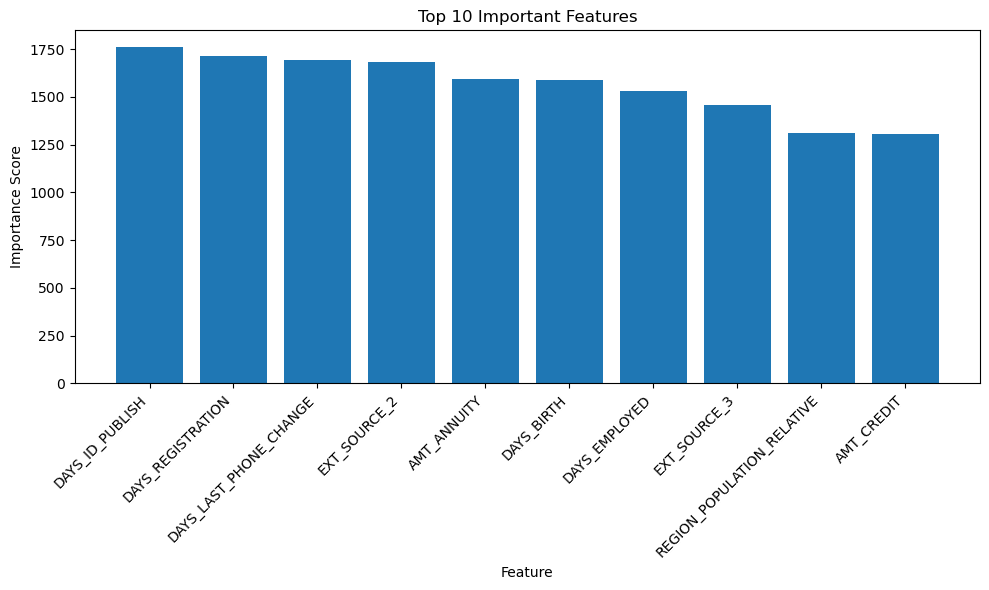

In [18]:
# After training the LightGBM model, get the feature importances
feature_importances = model_train.feature_importance()

# Create a dictionary with feature names and their importances
feature_importance_dict = dict(zip(X_train_resampled.columns, feature_importances))

# Sort the features based on their importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the top N important features
N = 10
print(f"Top {N} important features:")
for feature, importance in sorted_feature_importance[:N]:
    print(f"{feature}: {importance}")

# You can also plot the feature importances using a bar chart
# Create a list of feature names and their importances
feature_names, importance_scores = zip(*sorted_feature_importance)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names[:N])), importance_scores[:N], tick_label=feature_names[:N])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

In [27]:
defaulters_data = X_train_resampled[y_train_resampled == 1]
non_defaulters_data = X_train_resampled[y_train_resampled == 0]

# Loop through each feature and analyze its distribution for defaulters and non-defaulters
for feature, importance in sorted_feature_importance[:N]:
    print(f"\nFeature: {feature}")
    print("Defaulters:")
    print(defaulters_data[feature].describe())
    print("\nNon-Defaulters:")
    print(non_defaulters_data[feature].describe())


Feature: DAYS_ID_PUBLISH
Defaulters:
count    49469.000000
mean     -2754.235137
std       1338.377973
min      -4944.000000
25%      -3989.000000
50%      -2804.000000
75%      -1628.000000
max       -375.000000
Name: DAYS_ID_PUBLISH, dtype: float64

Non-Defaulters:
count    65958.000000
mean     -3010.319355
std       1468.066281
min      -4944.000000
25%      -4312.750000
50%      -3300.000000
75%      -1746.000000
max       -375.000000
Name: DAYS_ID_PUBLISH, dtype: float64

Feature: DAYS_REGISTRATION
Defaulters:
count    49469.000000
mean     -4392.604172
std       2865.709525
min     -11416.000000
25%      -6284.000000
50%      -4024.000000
75%      -2036.309253
max       -330.000000
Name: DAYS_REGISTRATION, dtype: float64

Non-Defaulters:
count    65958.000000
mean     -4948.717776
std       3345.262971
min     -11416.000000
25%      -7545.000000
50%      -4520.000000
75%      -2046.000000
max       -330.000000
Name: DAYS_REGISTRATION, dtype: float64

Feature: DAYS_LAST_PHONE_CH

## 5.3 LGB Model on Cleaned App_train_bureau Dataframe

In [357]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re

# Removing special characters from column names
clean_names_trainb = [re.sub(r'\W+', '_', feature) for feature in Xb_train.columns]
clean_names_valb = [re.sub(r'\W+', '_', feature) for feature in Xb_val.columns]

# Assigning the clean column names to your dataset
Xb_train.columns = clean_names_trainb
Xb_val.columns = clean_names_valb


# Creating a LightGBM dataset
trainb_data = lgb.Dataset(Xb_train, label=yb_train)
valb_data = lgb.Dataset(Xb_val, label=yb_val)

# Seting the parameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.5,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Training the LightGBM model
model_trainb = lgb.train(params, trainb_data, num_boost_round=100)
model_valb = lgb.train(params, valb_data, num_boost_round=100)

# Making predictions on the testing set
yb_pred_train = model_trainb.predict(Xb_train)
yb_pred_val = model_valb.predict(Xb_val)

# Converting probabilities to binary predictions
yb_pred_train_binary = [1 if p >= 0.5 else 0 for p in yb_pred_train]
yb_pred_val_binary = [1 if p >= 0.5 else 0 for p in yb_pred_val]

# Calculating accuracy and confusion matrix
accuracy_trainb = accuracy_score(yb_train, yb_pred_train_binary)
accuracy_valb = accuracy_score(yb_val, yb_pred_val_binary)
print("Accuracy of Training Model:", accuracy_trainb)
print("Accuracy of Validation Model:", accuracy_valb)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(yb_train, yb_pred_train_binary))
print('Validation confusion matrix:\n', confusion_matrix(yb_val, yb_pred_val_binary))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Accuracy of Training Model: 0.9504
Accuracy of Validation Model: 0.9956666666666667

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[95612  1083]
 [ 4125  4180]]
Validation confusion matrix:
 [[41478    26]
 [  169  3327]]


## 5.4 LGB Model on Cleaned App_train_bureau Dataframe with Sampling

In [383]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re

# Performing one-hot encoding on categorical columns
categorical_columns_b = train_bureau_sample.select_dtypes(include=['object']).columns
app_train_bureau_clean_encoded = pd.get_dummies(train_bureau_sample, columns=categorical_columns_b)

# Separating features and target variable
Xb = app_train_bureau_clean_encoded.drop('TARGET', axis=1)
yb = app_train_bureau_clean_encoded['TARGET']

# Splitting the data into training and validation sets
Xb_train, Xb_val, yb_train, yb_val = train_test_split(Xb, yb, test_size=0.3, random_state=42)

# Removing special characters from column names
clean_names_trainb = [re.sub(r'\W+', '_', feature) for feature in Xb_train.columns]
clean_names_valb = [re.sub(r'\W+', '_', feature) for feature in Xb_val.columns]

# Assigning the clean column names to the dataframes
Xb_train.columns = clean_names_trainb
Xb_val.columns = clean_names_valb

# Applying oversampling and undersampling
oversampler = SMOTE(sampling_strategy=0.25)  
undersampler = RandomUnderSampler(sampling_strategy=0.75)  

Xb_train_oversampled, yb_train_oversampled = oversampler.fit_resample(Xb_train, yb_train)
Xb_train_resampled, yb_train_resampled = undersampler.fit_resample(Xb_train_oversampled, yb_train_oversampled)

Xb_val_oversampled, yb_val_oversampled = oversampler.fit_resample(Xb_val, yb_val)
Xb_val_resampled, yb_val_resampled = undersampler.fit_resample(Xb_val_oversampled, yb_val_oversampled)


# Creating a LightGBM dataset
trainb_data = lgb.Dataset(Xb_train_resampled, label=yb_train_resampled)
valb_data = lgb.Dataset(Xb_val_resampled, label=yb_val_resampled)

# Seting the parameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.5,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Training the LightGBM model
model_trainb = lgb.train(params, trainb_data, num_boost_round=100)
model_valb = lgb.train(params, valb_data, num_boost_round=100)

# Making predictions on the testing set
yb_pred_train = model_trainb.predict(Xb_train_resampled)
yb_pred_val = model_valb.predict(Xb_val_resampled)

# Converting probabilities to binary predictions
yb_pred_train_binary = [1 if p >= 0.5 else 0 for p in yb_pred_train]
yb_pred_val_binary = [1 if p >= 0.5 else 0 for p in yb_pred_val]

# Calculating accuracy and confusion matrix
accuracy_trainb = accuracy_score(yb_train_resampled, yb_pred_train_binary)
accuracy_valb = accuracy_score(yb_val_resampled, yb_pred_val_binary)
print("Accuracy of Training Model:", accuracy_trainb)
print("Accuracy of Validation Model:", accuracy_valb)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(yb_train_resampled, yb_pred_train_binary))
print('Validation confusion matrix:\n', confusion_matrix(yb_val_resampled, yb_pred_val_binary))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Accuracy of Training Model: 0.9651259684768541
Accuracy of Validation Model: 0.9986782321354812

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[31902   328]
 [ 1639 22534]]
Validation confusion matrix:
 [[13831     3]
 [   29 10347]]


## 5.5 LGB Results

In [415]:
# predicting model on the app_test_cleaned dataframe

categorical_columns_test = app_test_cleaned.select_dtypes(include=['object']).columns
app_test_cleaned_encoded = pd.get_dummies(app_test_cleaned, columns=categorical_columns_test)

results = pd.DataFrame({'SK_ID_CURR': app_test_cleaned_encoded.index, 'TARGET': model_train.predict(app_test_cleaned_encoded,  predict_disable_shape_check=True)})
print(results) # Score = 0.65

       SK_ID_CURR    TARGET
0          100001  0.119634
1          100005  0.962380
2          100013  0.573833
3          100028  0.086589
4          100038  0.867201
...           ...       ...
48739      456221  0.063266
48740      456222  0.373507
48741      456223  0.035951
48742      456224  0.543214
48743      456250  0.101831

[48744 rows x 2 columns]


The LGB model with the best results is the LGB with 50 leaves and learning rate of 0.5 using the app_train_cleaned dataframe with sampling. Its accuracy using the training set was 99.8% and 100% on the validation set.
The kaggle score for this best model is 0.65.

# 6. Gradient Boosting Model

## 6.1 Gradient Boosting Model on Cleaned App_train Dataframe

In [401]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

missing_columns = ['NAME_INCOME_TYPE_Maternity_leave', 'NAME_FAMILY_STATUS_Unknown']

X_train_resampled2 = X_train_resampled.drop(missing_columns, axis=1)
X_val_resampled2 = X_val_resampled.drop(missing_columns, axis=1)

# Training a model on the training and validation set
GB_train_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=3, random_state=42)
GB_train_model.fit(X_train_resampled2, y_train_resampled)

GB_val_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=3, random_state=42)
GB_val_model.fit(X_val_resampled2, y_val_resampled)

# Making predictions 
GB_train_pred = GB_train_model.predict(X_train_resampled2)
GB_val_pred = GB_val_model.predict(X_val_resampled2)

# Calculating accuracy and confusion matrix
train_accuracy = accuracy_score(y_train_resampled, GB_train_pred)
val_accuracy = accuracy_score(y_val_resampled, GB_val_pred)
print("Accuracy of Training Model:", train_accuracy)
print("Accuracy of Validation Model:", val_accuracy)
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train_resampled, GB_train_pred))
print('Validation confusion matrix:\n', confusion_matrix(y_val_resampled, GB_val_pred))

Accuracy of Training Model: 0.8679858265397178
Accuracy of Validation Model: 0.8791970729143505

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[63668  2290]
 [12948 36521]]
Validation confusion matrix:
 [[27364   904]
 [ 5072 16129]]


## 6.2 Gradient Boosting Results

In [404]:
# predicting model on the app_test_cleaned dataframe

categorical_columns_test = app_test_cleaned.select_dtypes(include=['object']).columns
app_test_cleaned_encoded = pd.get_dummies(app_test_cleaned, columns=categorical_columns_test)

results = pd.DataFrame({'SK_ID_CURR': app_test_cleaned_encoded.index, 'TARGET': GB_train_model.predict(app_test_cleaned_encoded)})
print(results) 

C:\Users\jital\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- NAME_CONTRACT_TYPE_Cash loans
- NAME_CONTRACT_TYPE_Revolving loans
- NAME_EDUCATION_TYPE_Academic degree
- NAME_EDUCATION_TYPE_Higher education
- NAME_EDUCATION_TYPE_Incomplete higher
- ...
Feature names seen at fit time, yet now missing:
- NAME_CONTRACT_TYPE_Cash_loans
- NAME_CONTRACT_TYPE_Revolving_loans
- NAME_EDUCATION_TYPE_Academic_degree
- NAME_EDUCATION_TYPE_Higher_education
- NAME_EDUCATION_TYPE_Incomplete_higher
- ...

  warnings.warn(message, FutureWarning)


       SK_ID_CURR  TARGET
0          100001       0
1          100005       0
2          100013       0
3          100028       0
4          100038       0
...           ...     ...
48739      456221       0
48740      456222       0
48741      456223       0
48742      456224       0
48743      456250       0

[48744 rows x 2 columns]


The kaggle score for this model was a 0.55, meaning its not as good as the LGB model.

# 7. Final Results

In [416]:
results.to_csv("Submission.csv", index=False)

In the end the best model was the light gradient boosting one using the upsampled then downsampled data. Its accuracy using the training set was 99.8% and 100% on the validation set.
The kaggle score for this best model is 0.65.